In [2]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch_nn import TorchNN
from torch_nn_bn import TorchNNBN

In [3]:
olivetti_faces = fetch_olivetti_faces(data_home="./data", shuffle=True)
images = torch.tensor(olivetti_faces.data, dtype=torch.float)
targets = torch.tensor(olivetti_faces.target, dtype=torch.long)
datasets = [(img, lbl) for img, lbl in zip(images, targets)]
dl = torch.utils.data.DataLoader(datasets, batch_size=40, shuffle=True)

In [4]:
epochs = 120
learning_rate = 0.01

In [5]:
def train_model(epochs,optimizer):
    train_losses = []
    loss_fn = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        for img, target in dl:
            out = model(img.reshape(-1, 64 * 64))
            loss = loss_fn(out, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'epoch {epoch}, loss {loss.item()}')
        train_losses.append(loss.item())
    return train_losses

In [6]:
def draw_train_losses(train_losses):
    for i, loss in enumerate(train_losses):
        plt.plot(loss, label=f'loss {i}')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('train loss')
    plt.show()

In [8]:
model = TorchNN()
optimizer_Adam = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer_SGD = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizers = [optimizer_Adam, optimizer_SGD]
train_hits = [train_model(epochs=epochs, optimizer=optimizer) for optimizer in optimizers]

epoch 0, loss 3.7674663066864014
epoch 1, loss 3.6886210441589355
epoch 2, loss 3.6966004371643066
epoch 3, loss 3.7017955780029297
epoch 4, loss 3.6868858337402344
epoch 5, loss 3.695913314819336
epoch 6, loss 3.688541889190674
epoch 7, loss 3.6901557445526123
epoch 8, loss 3.6945958137512207
epoch 9, loss 3.69142484664917
epoch 10, loss 3.692533493041992
epoch 11, loss 3.691124439239502
epoch 12, loss 3.6921563148498535
epoch 13, loss 3.6913399696350098
epoch 14, loss 3.691701889038086
epoch 15, loss 3.69236421585083
epoch 16, loss 3.692666530609131
epoch 17, loss 3.6940054893493652
epoch 18, loss 3.69270658493042
epoch 19, loss 3.695976734161377
epoch 20, loss 3.6942973136901855
epoch 21, loss 3.6942763328552246
epoch 22, loss 3.690657138824463
epoch 23, loss 3.6912543773651123
epoch 24, loss 3.691089153289795
epoch 25, loss 3.6946539878845215
epoch 26, loss 3.6942410469055176
epoch 27, loss 3.6928741931915283
epoch 28, loss 3.6919567584991455
epoch 29, loss 3.6936004161834717
epoch

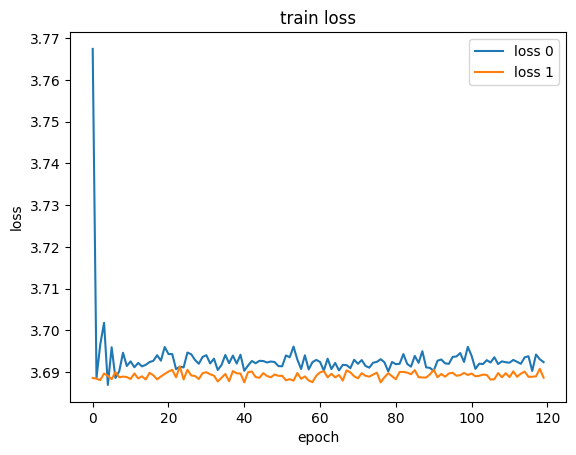

In [9]:
draw_train_losses(train_hits)